# Support Vector Machines

SVMS are powerful models capable of performing linear or nonliner classificaiotn, regression, & even outlier detection. SVM's are particulary well suited for classification of complex small or medium-sized datasets.

## *Linear SVM Classification*

The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points.

You can think of an SVM classifier as fitting the widest possible street (represented by the parallel dashed lines) beteween the classes, which is called `large margin classification`.

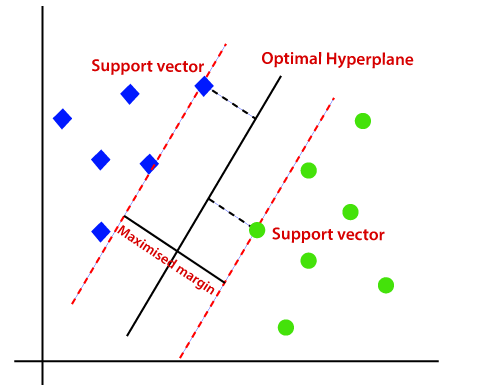

### Soft Margin Classification

If we strictly impose that alll instances must be off the street and on the right side, this is called `hard margin classification`. But there are two main issues with `hard margin classification`:

1. It only works if the data is linearly seperable.
2. It is sensative to outliers. 

In order to avoid these issues, we need to use a more flexibl model e.g finding a good balance between keeping the street as wide as possible while also mimizing *margin violations*. This is called `soft margin classification`.

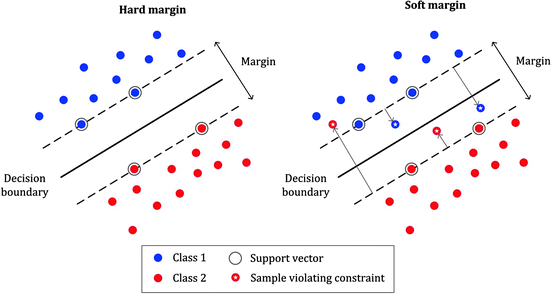

In Scikit-Learn, this can be achieved using the `C` parameter:

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # Petal Length, Petal Width
y = (iris["target"] == 2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ('model', LinearSVC(C=1, loss="hinge", dual='auto'))
])

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

array([1.])

## *NonLinear SVM Classification*

Although linear SVM classifiers are efficent and work well in many cases, many datasets are not even close to being linear. 

One approach to handling nonlinear datasets is to add more features, such as polynomial features, which in some cases can result in a linearly seperable dataset.

You can implement this idea using Scikit-Learn using the `PolynomialFeatures` transformer, followed by a `StandardScaler` and a `LinearSVC`:

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("model", LinearSVC(C=10, loss="hinge", dual='auto'))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('model', LinearSVC(C=10, dual='auto', loss='hinge'))])

### Polynomial Kernal

The issue with polynomial features is that at a **low polynomial degree**, this method cannot deal with very complex datasets, and w/ a **high polynomial degree** it creates a huge number of features and thereby making the model too slow.

To overcome this, you can use what's called the `Kernal Trick` w/ SVM's, which makes it possible to get the same result as if you had added polynomial features w/out needing to actually add them.

In [10]:
from sklearn.svm import SVC

poly_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=5, coef0=1, kernel='poly'))])

In essence, what the kernel trick does for us is to offer a more efficient and less expensive way to transform data into higher dimensions. With that saying, the application of the kernel trick is not limited to the SVM algorithm. Any computations involving the dot products (x, y) can utilize the kernel trick.

### Similarity Features

Another technique to taclker nonlinear datasets is to add features computed using a `similarity function`, which measuers how much each instance resembls a particular `landmark`.

For example, we could select -1 and 1 as the landmarks for a given instance. Then, for each value of x1, we calculate how far it is from the first landmark (read on to see how to define ‘far’). This is our new similarity feature, x2. Then we do the same, comparing values of x1 to the second landmark to obtain x3:

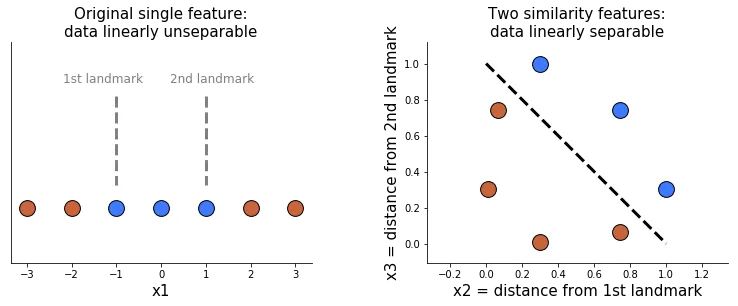

The simpliest approach to selecting landmarks is to create a landmark at each and every instance in the dataset, which creates many dimensions and thus increases the chances that the transformed dataset will be linearly seperable. However, the downside is that training set with `m` instances will get transformed into a training set with `m` instances and `m` features, which can be computationally expensive with large datasets.

A common approach to finding the right hyperparameter values is to use an initial rough grid search and then a finer grid search around the best values found.


### Gaussian RBF Kernal

To overcome the large dataset issue when using Similarity Features, using the Kernal Trick can once again come to the rescue:

In [14]:
rbf_kernal_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernal_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(C=0.001, gamma=5))])

With so many kernals that exist, how do you know which one to choose from? As a rule of thumb, you should always default to `linear` kernal first (especifically if the training set is very large or it has a large number of features. If the training set isn't massive, the gaussian RBF kernal is a good choice.

You can always experiment with other kernal options if you have enough computational power using a grid search.

### Computational Complexity

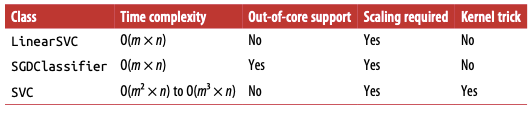

## *SVM Regression*

As mentione earlier, SVM's are also capable of supporting linear and nonlinear regression. The trick is to reverse the objective - instead of trying to the largest possible street **between** two classes while limiting margin violations, the SVM while try to fit as many instances as possible **on** the street while limiting margin violations.

The width of the street is controlled by the hyperparameter, `epsilon`.

In [16]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, dual="auto")
svm_reg.fit(X, y)

LinearSVR(dual='auto', epsilon=1.5)

To tackle nonlinear regression tasks, you can use a kernelizaed SVM model:

In [18]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X ,y)

SVR(C=100, degree=2, kernel='poly')

The `LinearSVR` class scales linearly with the size of the training set (just like the `LinearSVC` class), while the `SVR` class gets too slow ehn the trianing set grows large (just like the `SVC` class).

## *Exercises*

1. **What is the fundamental idea behind SVMs?**

afalkfma

2. **What is a support vector?**

akfmalf

3. **Why is it important to scale the inputs when using SVM's?**

fkajf

4. **Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?**

fklamf

5. **Should use the primal or dual form of the SVM problem to train a model on a dataset w/ millions of instances and hundreds of features?**

afjaf

6. **Suppose you've trained an SVM classifier with an RBF kernal but it seems to be underfitting the training set. Should increase or decrease y (`gamma`)? What about `C`?

faklfma

8. Train a `LinearSVC` on a linear seperable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

`Kaggle`

9. Train an SVM classifier on the SVM dataset. Since the SVM classifiers are binary, you will need to use one-versus-the-rest to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up

`Kaggle`

10. 

`Kaggle`